# 📦 Nigeria Fake News Detection - Required Libraries

```bash
!pip install numpy pandas scikit-learn tensorflow torch transformers nltk spacy matplotlib seaborn


- `numpy` - used for numerical operations and handling arrays
- `pandas` - used for loading and preprocessing tabular datasets
- `scikit-learn` - used for vectorization, ML models, and evaluation metrics
- `tensorflow` - used for building and training deep learning models
- `torch` - used for training models with PyTorch (alternative to TensorFlow)
- `transformers` - used for loading pre-trained NLP models like BERT
- `nltk` - used for basic NLP tasks like tokenization and stopword removal
- `spacy` - used for advanced NLP tasks like lemmatization and named entity recognition
- `matplotlib` - used for visualizing results (e.g., accuracy/loss curves)
- `seaborn` - used for creating advanced visualizations and heatmaps


In [1]:
#uncomment cell to use
!pip install numpy pandas scikit-learn tensorflow torch transformers nltk spacy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading And Intial Inspection

In [3]:
# Load the Excel file into a DataFrame
df = pd.read_excel('/content/nigeria_synthetic_news_dataset.xlsx')

# Display the first few rows
df.head()

,headline,source,label
0,"Government introduces N5,000 fine for speaking...",ICIR Nigeria,fake
1,INEC releases election timetable for 2027 gene...,Peoples Gazette,real
2,"Buhari to return as president in 2027, says to...",The Nation,fake
3,President inaugurates new railway terminal in ...,GistReel,real
4,CBN unveils new cashless policy strategy,Leadership,real


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  1000 non-null   object
 1   source    1000 non-null   object
 2   label     1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


##Data Cleaning

In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
headline    0
source      0
label       0
dtype: int64


In [6]:
# Remove duplicate rows
df = df.drop_duplicates()

## Exploratory Data Analysis

Label distribution plot

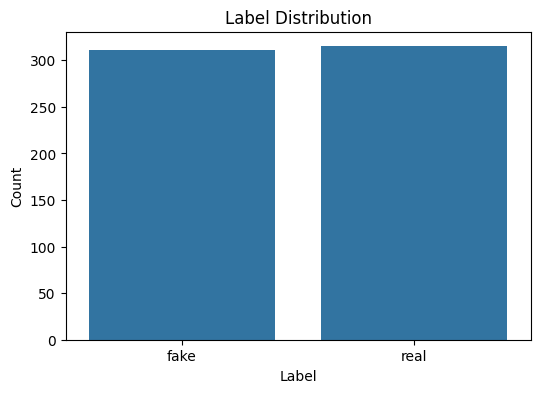

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


Source distribution plot (top 10 sources)

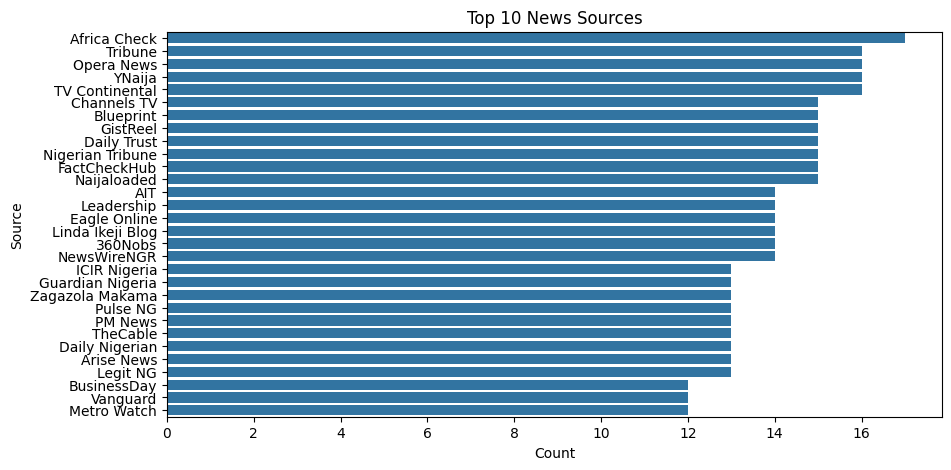

In [8]:
top_sources = df['source'].value_counts().nlargest(30).index
plt.figure(figsize=(10,5))
sns.countplot(y='source', data=df[df['source'].isin(top_sources)], order=top_sources)
plt.title("Top 10 News Sources")
plt.xlabel("Count")
plt.ylabel("Source")
plt.show()


In [9]:
unique_classes = df['source'].unique()
print(unique_classes)


['ICIR Nigeria' 'Peoples Gazette' 'The Nation' 'GistReel' 'Leadership'
 'TV Continental' 'Daily Nigerian' 'Pulse NG' 'PM News' 'Eagle Online'
 'Tribune' 'TheCable' 'Blueprint' 'Vanguard' 'AIT' 'Naija News'
 'Linda Ikeji Blog' 'Zagazola Makama' 'Metro Watch' 'BellaNaija' 'Punch'
 'Arise News' 'Nairametrics' 'Independent NG' 'Sahara Reporters' 'Dubawa'
 'Tori NG' 'Africa Check' 'The Sun' 'YNaija' 'Politics Nigeria'
 'Channels TV' 'City People' 'FactCheckHub' 'ThisDay' 'NewsWireNGR'
 'Orient Daily' 'Naijaloaded' 'Opera News' 'Ripples Nigeria'
 'Guardian Nigeria' 'Premium Times' 'Daily Trust' 'Nigerian Tribune'
 'Nigerian Bulletin' '360Nobs' 'NAN' 'Legit NG' 'BusinessDay']


Headline length distribution by label

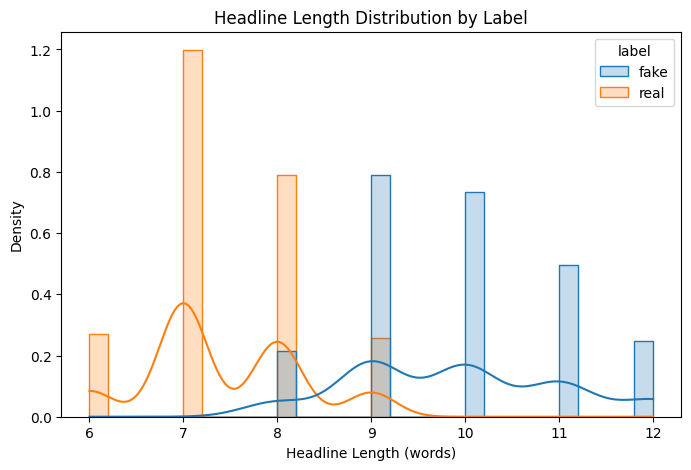

In [10]:
# Calculate headline length in words
df['headline_len'] = df['headline'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='headline_len', hue='label', bins=30, kde=True, element='step', stat='density')
plt.title("Headline Length Distribution by Label")
plt.xlabel("Headline Length (words)")
plt.ylabel("Density")
plt.show()


Word cloud for fake news headlines

In [11]:
from wordcloud import WordCloud, STOPWORDS


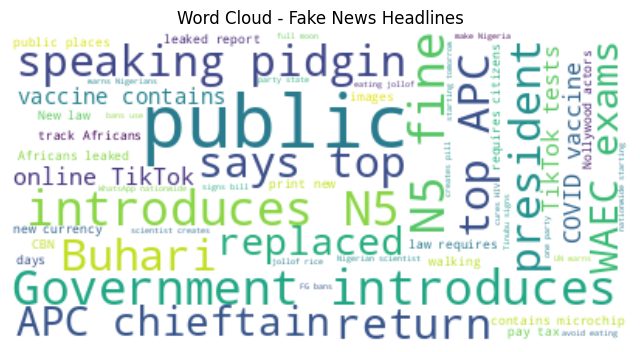

In [12]:
fake_text = ' '.join(df[df['label'] == 'fake']['headline'])

wordcloud_fake = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=100).generate(fake_text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Fake News Headlines")
plt.show()


Word cloud for real news headlines

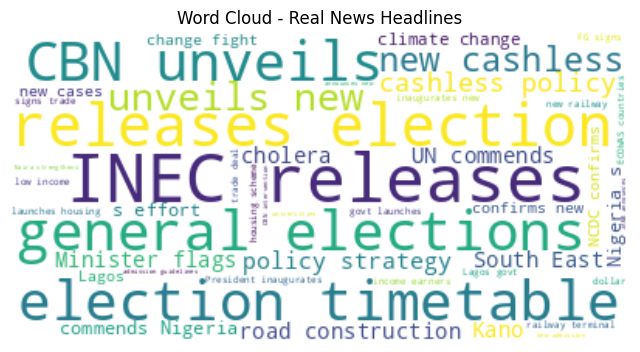

In [13]:
real_text = ' '.join(df[df['label'] == 'real']['headline'])

wordcloud_real = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=100).generate(real_text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Real News Headlines")
plt.show()


Top 20 common words in fake and real headlines

<ipython-input-14-e02cdd8f9e91>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(fake_counts), y=list(fake_words), palette='Reds_r')
<ipython-input-14-e02cdd8f9e91>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(real_counts), y=list(real_words), palette='Blues_r')


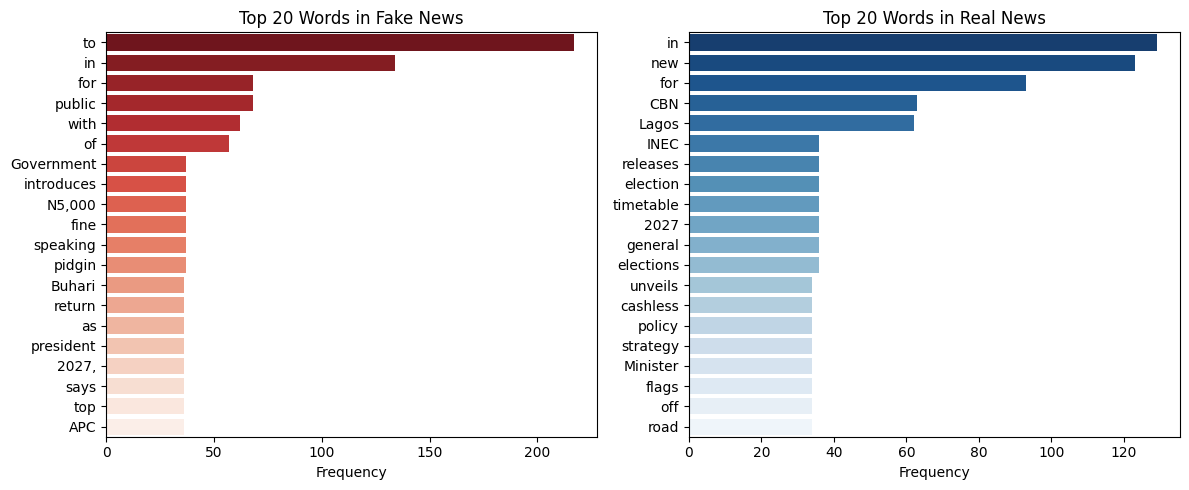

In [14]:
from collections import Counter

def get_top_words(text_series, n=20):
    words = ' '.join(text_series).split()
    counter = Counter(words)
    return counter.most_common(n)

top_fake = get_top_words(df[df['label'] == 'fake']['headline'])
top_real = get_top_words(df[df['label'] == 'real']['headline'])

fake_words, fake_counts = zip(*top_fake)
real_words, real_counts = zip(*top_real)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.barplot(x=list(fake_counts), y=list(fake_words), palette='Reds_r')
plt.title("Top 20 Words in Fake News")
plt.xlabel("Frequency")

plt.subplot(1, 2, 2)
sns.barplot(x=list(real_counts), y=list(real_words), palette='Blues_r')
plt.title("Top 20 Words in Real News")
plt.xlabel("Frequency")

plt.tight_layout()
plt.show()


Headline length by label (Box plot)

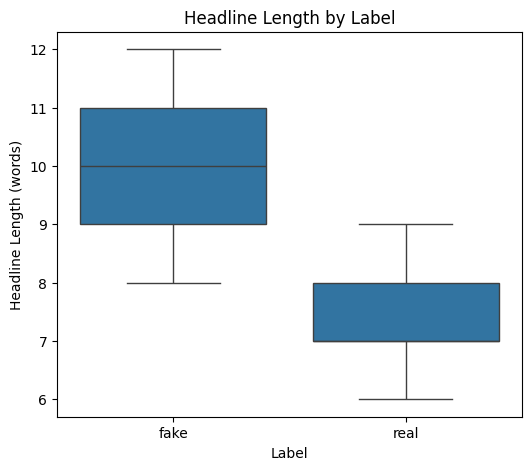

In [15]:
plt.figure(figsize=(6,5))
sns.boxplot(x='label', y='headline_len', data=df)
plt.title("Headline Length by Label")
plt.xlabel("Label")
plt.ylabel("Headline Length (words)")
plt.show()


Source vs Label (Stacked bar chart)

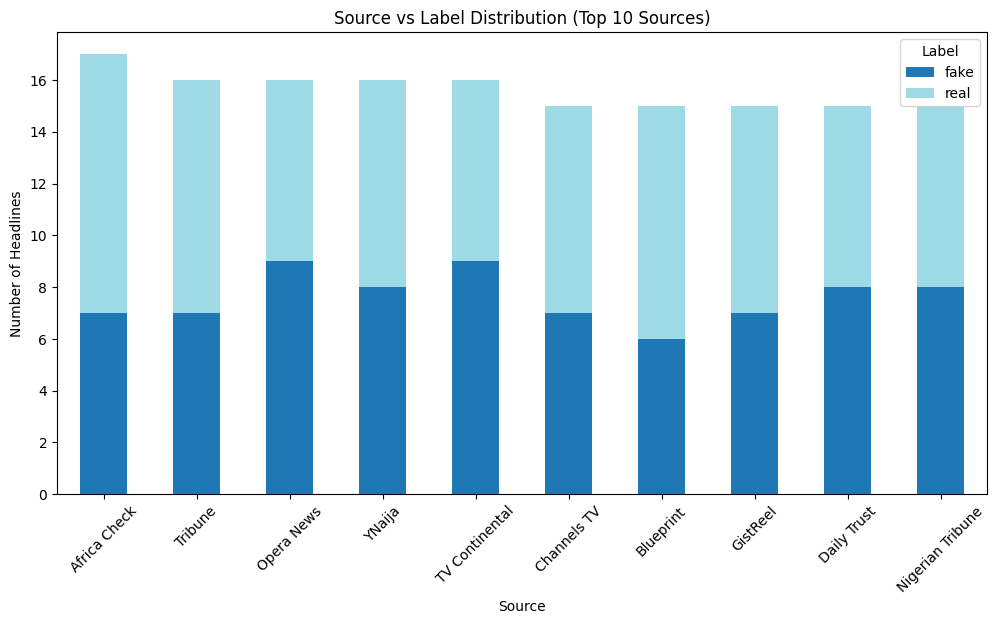

In [16]:
source_label_counts = df.groupby(['source', 'label']).size().unstack(fill_value=0)

# Limit to top 10 sources
top_sources = df['source'].value_counts().nlargest(10).index
source_label_counts = source_label_counts.loc[top_sources]

source_label_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Source vs Label Distribution (Top 10 Sources)")
plt.xlabel("Source")
plt.ylabel("Number of Headlines")
plt.legend(title='Label')
plt.xticks(rotation=45)
plt.show()


## Data Preprocessing

## 🧹 Text Preprocessing with spaCy (Transformer-based)

This code performs advanced text preprocessing on news headlines as part of the **Data Cleaning** stage of a Fake News Detection project.

### 🔍 What's Happening:

1. **Import Libraries**:
   - `spacy`: for NLP tasks.
   - `tqdm`: to show progress bars while processing data.

2. **Load Model**:
   - Loads `en_core_web_trf`, a transformer-based spaCy model for powerful lemmatization and token-level understanding.

3. **Preprocessing Function**:
   - `preprocess_title` processes each headline by:
     - Lowercasing the text.
     - Lemmatizing (reducing words to their base form).
     - Removing stopwords and non-alphabetic tokens (like numbers or punctuation).

4. **Apply to Dataset**:
   - Uses `progress_apply()` to apply the function to all rows in the `"title"` column (assumed to contain the headlines), with a visible progress bar.

5. **New Column**:
   - Stores cleaned text in a new column `cleaned_title` for later use in vectorization or modeling.

### 📍 Project Stage:
This step belongs to the **Data Cleaning / Preprocessing** phase before feeding text into machine learning models.


In [17]:
!pip install -U spacy spacy-transformers
!python -m spacy download en_core_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 4.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [18]:
import spacy
import pandas as pd
import numpy as np
from tqdm import tqdm  # Import progress bar library

# Load transformer-based spaCy model
nlp = spacy.load("en_core_web_trf")  # Transformer-based model

# Function to preprocess text using en_core_web_trf
def preprocess_title(title):
    doc = nlp(title)
    tokens = [
        token.lemma_.lower()  # Convert to lowercase and lemmatize
        for token in doc
        if not token.is_stop and token.is_alpha  # Remove stopwords & non-alphabetic tokens
    ]
    return " ".join(tokens)

# Enable progress bar for DataFrame apply
tqdm.pandas()

# Apply preprocessing with progress tracking
df["cleaned_headline"] = df["headline"].progress_apply(preprocess_title)

print(df.head())  # Display the first few rows

100%|██████████| 626/626 [01:25<00:00,  7.35it/s]

                                            headline           source label  \
0  Government introduces N5,000 fine for speaking...     ICIR Nigeria  fake   
1  INEC releases election timetable for 2027 gene...  Peoples Gazette  real   
2  Buhari to return as president in 2027, says to...       The Nation  fake   
3  President inaugurates new railway terminal in ...         GistReel  real   
4           CBN unveils new cashless policy strategy       Leadership  real   

   headline_len                                  cleaned_headline  
0             9     government introduce fine speak pidgin public  
1             8  inec release election timetable general election  
2            11         buhari return president say apc chieftain  
3             7   president inaugurate new railway terminal lagos  
4             6           cbn unveil new cashless policy strategy  


In [19]:
df.to_csv("preprocessed_headlines.csv", index=False)
print("Preprocessed data saved successfully!")

Preprocessed data saved successfully!


In [20]:
df = pd.read_csv("/content/preprocessed_headlines.csv")

In [21]:
df

,headline,source,label,headline_len,cleaned_headline
0,"Government introduces N5,000 fine for speaking...",ICIR Nigeria,fake,9,government introduce fine speak pidgin public
1,INEC releases election timetable for 2027 gene...,Peoples Gazette,real,8,inec release election timetable general election
2,"Buhari to return as president in 2027, says to...",The Nation,fake,11,buhari return president say apc chieftain
3,President inaugurates new railway terminal in ...,GistReel,real,7,president inaugurate new railway terminal lagos
4,CBN unveils new cashless policy strategy,Leadership,real,6,cbn unveil new cashless policy strategy
...,...,...,...,...,...
621,FG bans use of WhatsApp nationwide starting to...,Blueprint,fake,8,fg ban use whatsapp nationwide start tomorrow
622,INEC releases election timetable for 2027 gene...,The Nation,real,8,inec release election timetable general election
623,UN warns Nigerians to avoid eating jollof rice...,Eagle Online,fake,11,un warn nigerians avoid eat jollof rice moon
624,"Government introduces N5,000 fine for speaking...",Africa Check,fake,9,government introduce fine speak pidgin public


## Modelling

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Combine the two text columns into a single feature
df['text'] = df['cleaned_headline'].fillna('') + ' ' + df['source'].fillna('')

# Split features and target
X = df['text']
y = df['label']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Alternative models you could try
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


Accuracy: 1.0
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00        64
        real       1.00      1.00      1.00        62

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [26]:
import joblib

joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

## Using Small Spacy English Model

In [ ]:
# Load the Excel file into a DataFrame
df = pd.read_excel('/content/nigeria_synthetic_news_dataset.xlsx')

# Display the first few rows
df.head()

In [ ]:
import spacy
import pandas as pd
import numpy as np

# Load spaCy model
nlp = spacy.load("en_core_web_sm")



# Function to preprocess text
def preprocess_title(title):
    doc = nlp(title)
    tokens = [
        token.lemma_.lower()  # Convert to lowercase and lemmatize
        for token in doc
        if not token.is_stop and token.is_alpha  # Remove stopwords & non-alphabetic tokens
    ]
    return " ".join(tokens)

# Apply preprocessing
df["cleaned_headline"] = df["headline"].apply(preprocess_title)


In [ ]:
df.head()

## vectorizing the headline column (converting to numbers)

In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd

# Function to get document vector with error handling
def get_spacy_vectors(title, expected_dim=96):  # Adjust expected_dim based on your spaCy model
    try:
        if not title or not isinstance(title, str):
            print(f"Warning: Empty or non-string input: {title}")
            return np.zeros(expected_dim)

        doc = nlp(title)
        vector = doc.vector

        # Check if vector has expected dimensions
        if vector.shape[0] != expected_dim:
            print(f"Warning: Unexpected vector dimension {vector.shape[0]} for text: {title[:50]}...")
            return np.zeros(expected_dim)

        return vector
    except Exception as e:
        print(f"Error processing: '{title[:50]}...' - {str(e)}")
        return np.zeros(expected_dim)

# Apply vectorization with progress bar
tqdm.pandas(desc="Vectorizing documents")
df["vector"] = df["cleaned_headline"].progress_apply(get_spacy_vectors)

# Verify vectors before stacking
vector_lengths = df["vector"].apply(len).value_counts()
print("Vector dimensions distribution:")
print(vector_lengths)

# Filter out any problematic vectors if needed
if len(vector_lengths) > 1:
    most_common_dim = vector_lengths.index[0]
    print(f"Filtering to keep only vectors with dimension {most_common_dim}")
    df = df[df["vector"].apply(len) == most_common_dim]
    print(f"Remaining samples: {len(df)}")

# Convert to NumPy array
X = np.stack(df["vector"].values)
y = df["label"].values  # Labels: 0 (Real) / 1 (Fake)
print("Feature Matrix Shape:", X.shape)
print("Labels Shape:", y.shape)

## converting vector to a numpy array

In [ ]:
import numpy as np
import pandas as pd

# Assuming df contains your preprocessed data with the 'vector' column
# and 'label' column (0 for Real news, 1 for Fake news)

# First, check that all vectors have the same dimension
vector_dims = df["vector"].apply(lambda x: x.shape[0] if hasattr(x, 'shape') else len(x))
unique_dims = vector_dims.unique()

if len(unique_dims) > 1:
    print(f"Warning: Found vectors with different dimensions: {unique_dims}")
    most_common_dim = vector_dims.value_counts().index[0]
    print(f"Using most common dimension: {most_common_dim}")

    # Filter to keep only vectors with the most common dimension
    df = df[vector_dims == most_common_dim]
    print(f"Filtered dataset size: {len(df)}")

# Convert vectors to NumPy array
try:
    # The np.stack function requires all arrays to have the same shape
    X = np.stack(df["vector"].values)
except ValueError as e:
    print(f"Error in stacking: {e}")
    # Alternative approach using list comprehension and np.array
    X = np.array([np.array(v) for v in df["vector"].values])

# Get labels
y = df["label"].values  # Labels: 0 (Real) / 1 (Fake)

# Print shapes
print("Feature Matrix Shape:", X.shape)
print("Labels Shape:", y.shape)

# Verify data types
print("X data type:", X.dtype)
print("y data type:", y.dtype)

# Quick check for NaN values

## Spllting and trying out models


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

## Performance Comparison: spaCy CNN vs Transformer Models

Both the spaCy CNN-based model (`en_core_web_sm`) and the Transformer-based model (`en_core_web_trf`) achieved **perfect accuracy** (1.00) on the test sets of the fake news detection task. However, it's important to consider *how* each model achieves this performance:

### 🧠 spaCy CNN Model:
- Relies on Convolutional Neural Networks (CNN).
- Requires traditional NLP preprocessing steps like:
  - Tokenization
  - Stopword removal
  - Lemmatization
- The processed text must be converted into numerical features using techniques like **TF-IDF vectorization** before feeding into ML models (e.g., Random Forest, SVM).
- More lightweight and faster to run, but may require **manual feature engineering**.

### 🤖 spaCy Transformer Model:
- Uses pre-trained Transformer architectures (e.g., BERT/RoBERTa) under the hood.
- Handles contextual language understanding better.
- Reduces the need for extensive preprocessing or manual feature extraction.
- Computationally more expensive but **captures deeper semantic meaning**, especially useful in nuanced fake news texts.

### 🔍 Conclusion:
While both approaches performed well in this case, Transformer models offer more **scalable** and **context-aware** solutions. However, for smaller datasets or lightweight environments, CNN-based models may still be a viable choice when paired with effective preprocessing.


## Model Performance Comparison Without Using the 'Source' Column

In this experiment, we removed the **'source'** feature and used only the **headline** text and **label** to train the fake news detection models. This helped simulate a more realistic scenario where the source of the information may not always be available.

### 🔍 Accuracy Results:
| Model                  | Accuracy |
|------------------------|----------|
| spaCy CNN Model        | 0.7802   |
| spaCy Transformer Model| 0.8302   |

### 🧠 spaCy CNN Model (TF-IDF + Random Forest)
- Accuracy: **0.7802**
- Performance dropped due to loss of contextual signal that the source provided.
- CNN-based models rely on TF-IDF or similar vectorizers, which treat words independently and may miss nuanced patterns without metadata like source.

### 🤖 spaCy Transformer Model (Contextual Embeddings + Random Forest)
- Accuracy: **0.8302**
- Despite not using the 'source', the Transformer-based approach retained stronger performance.
- This is due to its ability to capture **deeper semantic relationships** within the headline text itself, even without extra features.

### 📌 Why Performance Dropped
Removing the `source` column eliminates a potentially **strong predictive signal** — many fake or real headlines are often published consistently by specific news outlets. Without it:
- The model has to rely entirely on **textual patterns** in the headlines.
- Ambiguity increases, especially when fake and real headlines share similar language.
- This tests the **true generalization** ability of the NLP model and classifier.

### 💡 Takeaway
While adding metadata like `source` boosts performance, your model should ideally perform well **even without it**, especially in production scenarios where such fields might be missing or spoofed. Transformer models shine in such cases due to their deep language understanding.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics from your CNN and Transformer models (without 'source' column)
metrics = ['Precision', 'Recall', 'F1-Score']

cnn_scores = [0.78, 0.99, 0.87]   # class 0 (real)
transformer_scores = [0.85, 0.94, 0.89]  # class 0 (real)

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

# Plotting
plt.figure(figsize=(8,6))
plt.bar(x - width/2, cnn_scores, width, label='CNN (headline only)')
plt.bar(x + width/2, transformer_scores, width, label='Transformer (headline only)', color='orange')

# Labels and Title
plt.ylabel('Score')
plt.title('Model Comparison on Class 0 (Real News) - Without Source Column')
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
